Healthcare Admissions , Cost Analytics & Prediction

In [141]:
#Importing Libraries

import pandas as pd
import numpy as np


In [142]:

#Loading Dataset

df= pd.read_csv("healthcare_dataset.csv")


In [143]:
print("Dataset Loaded Successfully")

#View initial rows and columns to understand the structure
print ("Shape:",df.shape)
df.head()


Dataset Loaded Successfully
Shape: (55500, 15)


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [144]:
#Checking missing values

df.isnull().sum()

print("Missing Values: \n",df.isnull().sum())

#percentage missing
missing_percentage = df.isnull().mean() * 100

print(missing_percentage)



Missing Values: 
 Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64
Name                  0.0
Age                   0.0
Gender                0.0
Blood Type            0.0
Medical Condition     0.0
Date of Admission     0.0
Doctor                0.0
Hospital              0.0
Insurance Provider    0.0
Billing Amount        0.0
Room Number           0.0
Admission Type        0.0
Discharge Date        0.0
Medication            0.0
Test Results          0.0
dtype: float64


In [145]:
#Handling Missing Values

categorical_colmns = df.select_dtypes(include="object").columns
numeric_cols = df.select_dtypes(include=np.number).columns

df[categorical_colmns] = df[categorical_colmns].fillna("Unknown")
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print("Missing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [146]:
#Convert Date Columns

Date_Colms= ["Date of Admission", "Discharge Date"]

for col in Date_Colms:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df[Date_Colms].head() 

,Date of Admission,Discharge Date
0,2024-01-31,2024-02-02
1,2019-08-20,2019-08-26
2,2022-09-22,2022-10-07
3,2020-11-18,2020-12-18
4,2022-09-19,2022-10-09


In [147]:
#Derive length of Stay (In days)

df["Len_of_Stay"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days

#Check for negative or invalid stay durations
df[df["Len_of_Stay"] < 0].head()

# Replace negative with NaN (optional)
df.loc[df["Len_of_Stay"] < 0, "Len_of_Stay"] = np.nan

In [148]:
#Basic Statistics

Numerical_Summary = df.describe()
Categorical_Summary = df.describe(include=['object', 'category'])


Numerical_Summary,Categorical_Summary

print(Numerical_Summary)
print(Categorical_Summary)



                Age              Date of Admission  Billing Amount  \
count  55500.000000                          55500    55500.000000   
mean      51.539459  2021-11-01 01:02:22.443243008    25539.316097   
min       13.000000            2019-05-08 00:00:00    -2008.492140   
25%       35.000000            2020-07-28 00:00:00    13241.224652   
50%       52.000000            2021-11-01 00:00:00    25538.069376   
75%       68.000000            2023-02-03 00:00:00    37820.508436   
max       89.000000            2024-05-07 00:00:00    52764.276736   
std       19.602454                            NaN    14211.454431   

        Room Number                 Discharge Date   Len_of_Stay  
count  55500.000000                          55500  55500.000000  
mean     301.134829  2021-11-16 13:15:20.821621504     15.509009  
min      101.000000            2019-05-09 00:00:00      1.000000  
25%      202.000000            2020-08-12 00:00:00      8.000000  
50%      302.000000            202

In [149]:
#Additional Analysis

#Unique countrs for each categorical field
 
Unique_Counts= df[categorical_colmns].nunique()

#Average length of stay per medical condition

Avg_Stay_per_condition = df.groupby("Medical Condition")["Len_of_Stay"].mean()

#Average billing per condition

Avg_billing_Condition = df.groupby("Medical Condition")["Billing Amount"].mean()

Unique_Counts, Avg_Stay_per_condition, Avg_billing_Condition

print("Unique Counts:\n", Unique_Counts)
print("Average Length of Stay per Medical Condition:\n", Avg_Stay_per_condition)
print("Average Billing Amount per Medical Condition:\n", Avg_billing_Condition)



Unique Counts:
 Name                  49992
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64
Average Length of Stay per Medical Condition:
 Medical Condition
Arthritis       15.517404
Asthma          15.696570
Cancer          15.495827
Diabetes        15.422936
Hypertension    15.458626
Obesity         15.464305
Name: Len_of_Stay, dtype: float64
Average Billing Amount per Medical Condition:
 Medical Condition
Arthritis       25497.327056
Asthma          25635.249359
Cancer          25161.792707
Diabetes        25638.405577
Hypertension    25497.095761
Obesity         25805.971259
Name: Billing Amount, dtype: float64


DISCRIPTIVE ANALYSIS AND VISUALIZATION
1. Demographic distribution (Age distribution, Gender distribution, Blood tyope distribution)

In [150]:
#Importing Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

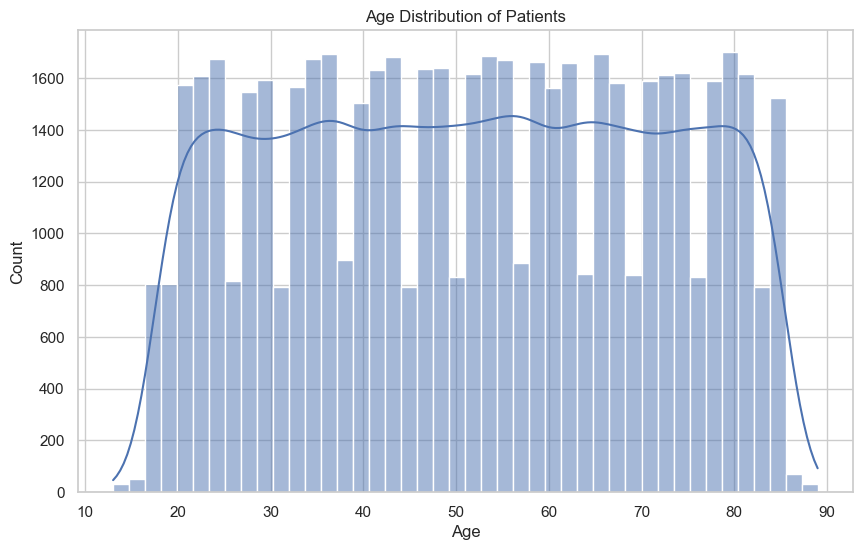

In [151]:
#Age Distribution

sns.histplot(df["Age"], kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

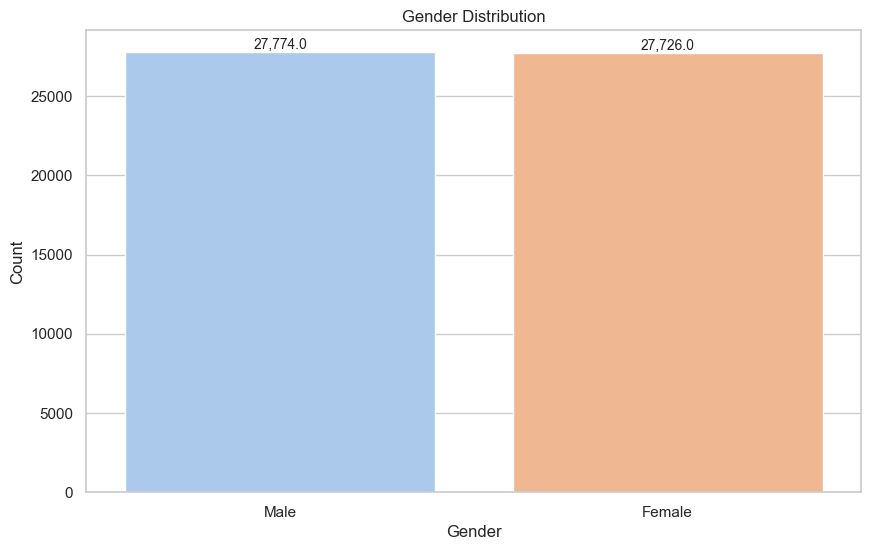

In [152]:
#Gender Distribution

ax = sns.countplot(data=df, x="Gender", hue="Gender", palette="pastel", legend=False)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:,}", 
        (p.get_x() + p.get_width() / 2, height),
        ha="center", va="bottom", fontsize=10
    )

plt.show()

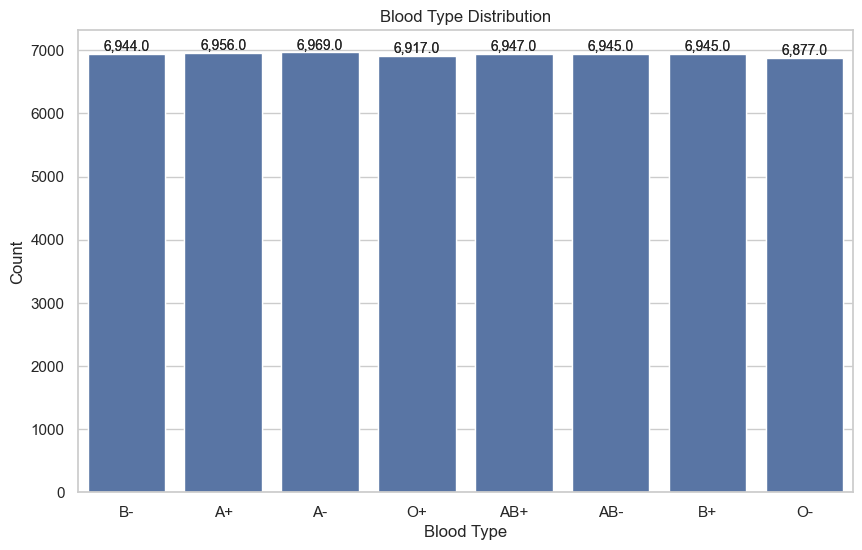

In [153]:
#Blood TYPE distribution

ax = sns.countplot(data=df, x="Blood Type", hue="Blood Type", palette="pastel", legend=False)
sns.countplot(data=df, x="Blood Type", order=df["Blood Type"].value_counts().index)
plt.title("Blood Type Distribution")
plt.xlabel("Blood Type")
plt.ylabel("Count")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:,}", 
        (p.get_x() + p.get_width() / 2, height),
        ha="center", va="bottom", fontsize=10
    )


plt.show()


ADMISSION TRENDS




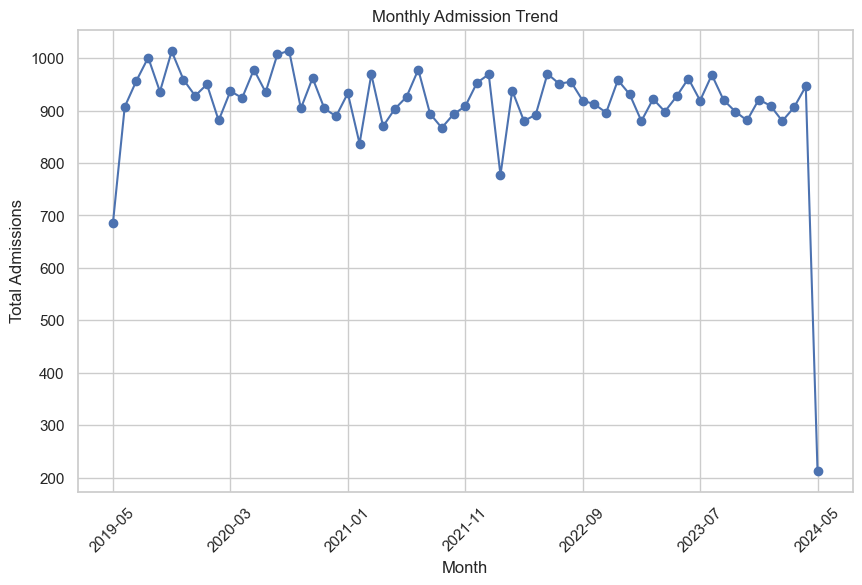

In [154]:
#Monthly Admission Counts

df["Admission_Month"] = df["Date of Admission"].dt.to_period("M").astype(str)

monthly_admissions = df["Admission_Month"].value_counts().sort_index()

monthly_admissions.plot(kind="line", marker="o")
plt.title("Monthly Admission Trend")
plt.xlabel("Month")
plt.ylabel("Total Admissions")
plt.xticks(rotation=45)
plt.show()


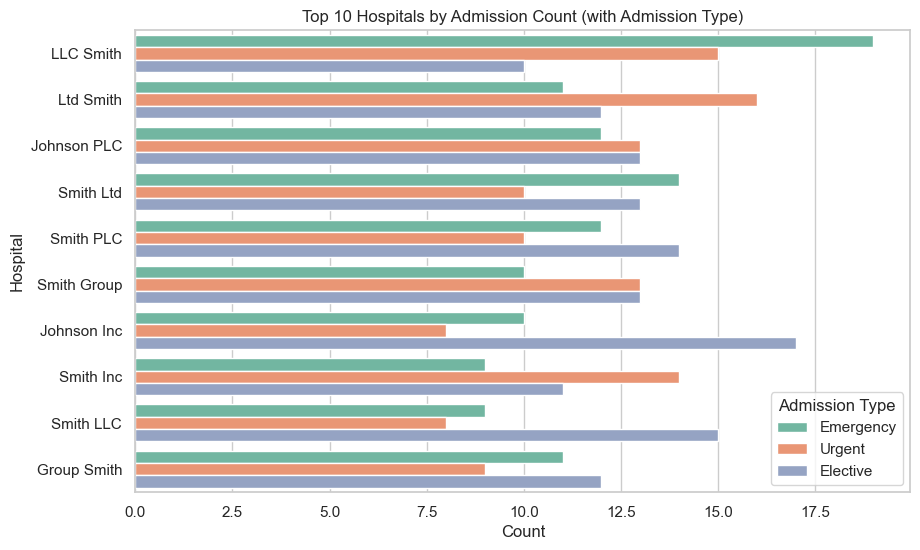

In [155]:
#Top 10 Hospitals by Admission Count

Top10_hospitals = df["Hospital"].value_counts().head(10).index

sns.countplot(
    data=df[df["Hospital"].isin(Top10_hospitals)],
    y="Hospital",
    order=Top10_hospitals,
    hue="Admission Type",      
    palette="Set2"
)

plt.title("Top 10 Hospitals by Admission Count (with Admission Type)")
plt.xlabel("Count")
plt.ylabel("Hospital")
plt.legend(title="Admission Type")
plt.show()




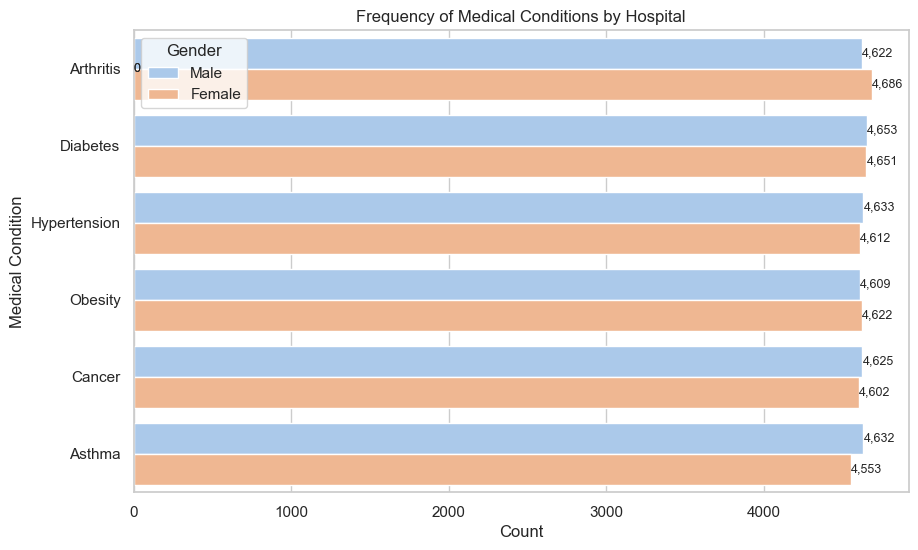

In [156]:
#Medical Condition Distribution by Gender

ax = sns.countplot(
    data=df,
    y="Medical Condition",
    hue="Gender",  
    order=df["Medical Condition"].value_counts().index,
    palette="pastel"
)

plt.title("Frequency of Medical Conditions by Hospital")
plt.xlabel("Count")
plt.ylabel("Medical Condition")

# Add count labels per segment
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
        f"{int(width):,}",
        (width + 1, p.get_y() + p.get_height() / 2),
        ha="left", va="center", fontsize=9
    )

plt.legend(title="Gender")
plt.show()



Billing Analyis


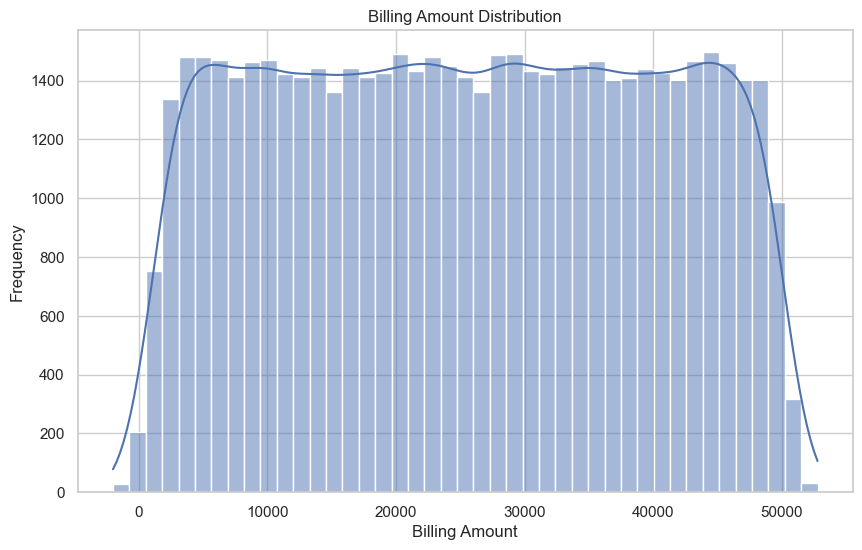

In [157]:
#Billing Amount Distribution

sns.histplot(df["Billing Amount"], kde=True)
plt.title("Billing Amount Distribution")
plt.xlabel("Billing Amount")
plt.ylabel("Frequency")
plt.show()


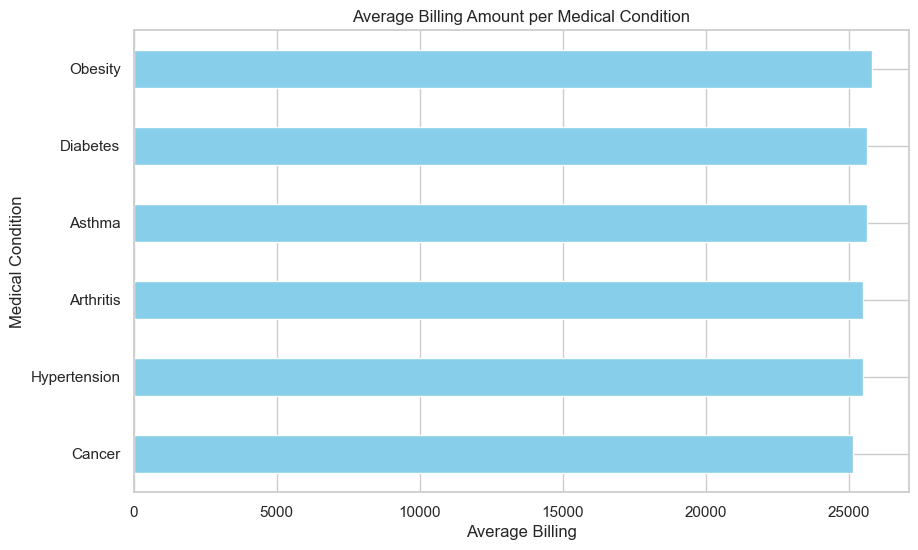

In [158]:
#Average Billing by Medical Condition

Avg_billing = df.groupby("Medical Condition")["Billing Amount"].mean().sort_values()

Avg_billing.plot(kind="barh", color="skyblue")
plt.title("Average Billing Amount per Medical Condition")
plt.xlabel("Average Billing")
plt.ylabel("Medical Condition")
plt.show()


LENGTH OF STAY ANALYSIS 

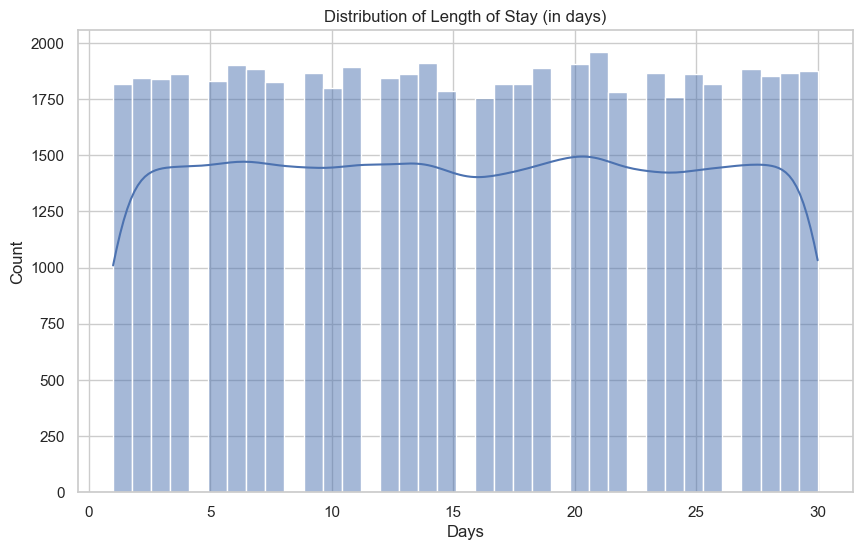

In [159]:
#Distribution of Length of Stay

sns.histplot(df["Len_of_Stay"].dropna(), kde=True)
plt.title("Distribution of Length of Stay (in days)")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()


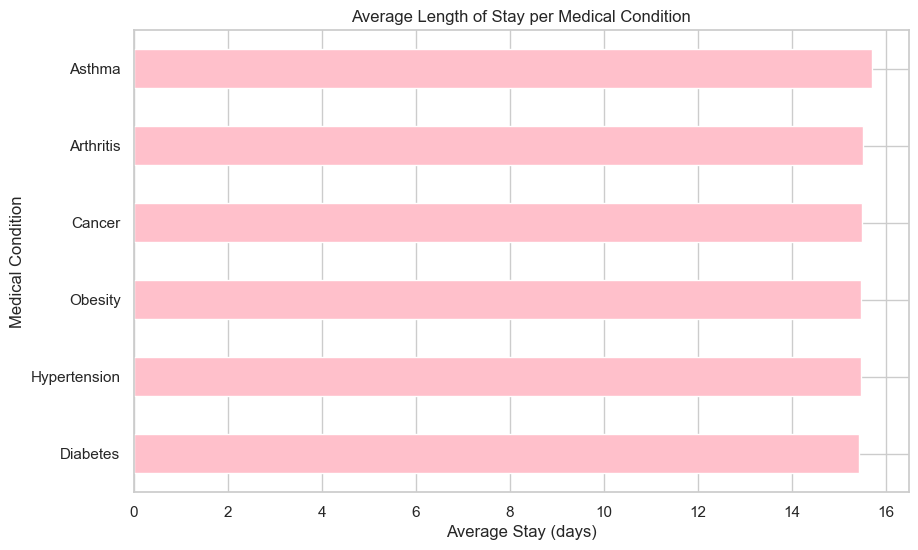

In [160]:
#Average Stay Duration by Medical Condition

avg_stay = df.groupby("Medical Condition")["Len_of_Stay"].mean().sort_values()

avg_stay.plot(kind="barh", color="pink")
plt.title("Average Length of Stay per Medical Condition")
plt.xlabel("Average Stay (days)")
plt.ylabel("Medical Condition")
plt.show()


CORREALTION ANALYSIS VIA HEATMAP

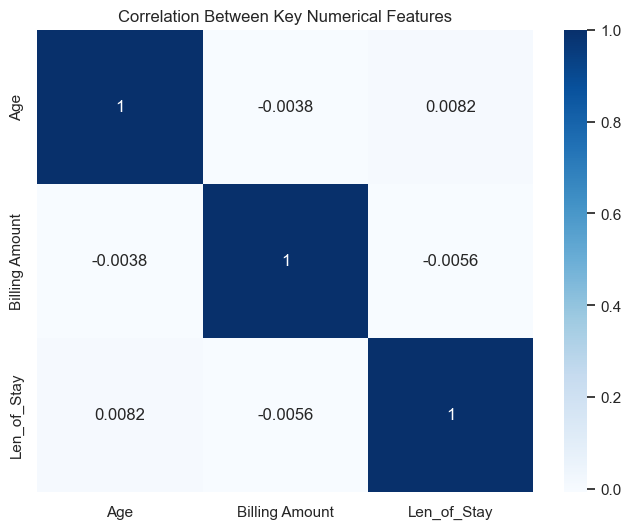

In [161]:
#Correaltion HEATMAP
plt.figure(figsize=(8,6))
sns.heatmap(df[["Age", "Billing Amount", "Len_of_Stay"]].corr(), annot=True, cmap="Blues")
plt.title("Correlation Between Key Numerical Features")
plt.show()


SEGMENTATION

In [162]:
#1. Rule Based Segmentations for Business Insights

#Segment by Age groups

# Createing age groups
df["Age_Group"] = pd.cut(
    df["Age"],
    bins=[0, 18, 40, 60, 100],
    labels=["Child", "Young Adult", "Middle-Aged", "Senior"]
)

# Average billing + stay per age group
Age_segment = df.groupby("Age_Group",observed=False)[["Billing Amount", "Len_of_Stay"]].mean()
Age_segment



,Billing Amount,Len_of_Stay
Age_Group,,
Child,26757.742344,15.476351
Young Adult,25586.559757,15.384867
Middle-Aged,25504.761744,15.552526
Senior,25473.065636,15.583260


In [163]:
#2. Segment by Medical Condition:

Condition_segment = df.groupby("Medical Condition")[["Billing Amount", "Len_of_Stay"]].agg(["mean", "count"])
Condition_segment.head()


Billing Amount       Len_of_Stay      
                            mean count        mean count
Medical Condition                                       
Arthritis           25497.327056  9308   15.517404  9308
Asthma              25635.249359  9185   15.696570  9185
Cancer              25161.792707  9227   15.495827  9227
Diabetes            25638.405577  9304   15.422936  9304
Hypertension        25497.095761  9245   15.458626  9245

In [164]:
#3. Segment by Insurance Provider

insurance_segment = df.groupby("Insurance Provider")[["Billing Amount", "Len_of_Stay"]].mean().sort_values("Billing Amount", ascending=False)
insurance_segment.head()
print("Age Segment:\n", Age_segment)
print("Condition Segment:\n", Condition_segment)

Age Segment:
              Billing Amount  Len_of_Stay
Age_Group                               
Child          26757.742344    15.476351
Young Adult    25586.559757    15.384867
Middle-Aged    25504.761744    15.552526
Senior         25473.065636    15.583260
Condition Segment:
                   Billing Amount       Len_of_Stay      
                            mean count        mean count
Medical Condition                                       
Arthritis           25497.327056  9308   15.517404  9308
Asthma              25635.249359  9185   15.696570  9185
Cancer              25161.792707  9227   15.495827  9227
Diabetes            25638.405577  9304   15.422936  9304
Hypertension        25497.095761  9245   15.458626  9245
Obesity             25805.971259  9231   15.464305  9231


In [165]:
#4. Segment by Hospital

hospital_segment = df.groupby("Hospital")[["Billing Amount", "Len_of_Stay"]].mean().sort_values("Billing Amount", ascending=False)
hospital_segment.head()




,Billing Amount,Len_of_Stay
Hospital,,
Hernandez-Morton,52373.032374,14.0
Walker-Garcia,52170.036854,2.0
Ruiz-Anthony,52154.237722,23.0
George-Gonzalez,52102.240889,9.0
Rocha-Carter,52092.669896,2.0


In [166]:
hospital_segment = df.groupby("Hospital")[["Billing Amount", "Len_of_Stay"]].mean().sort_values("Len_of_Stay", ascending=False)
hospital_segment.head()

,Billing Amount,Len_of_Stay
Hospital,,
Mcdaniel-Castaneda,43866.658476,30.0
Group Jacobson,37623.647512,30.0
Baxter-Garcia,41776.308878,30.0
Wright-Elliott,8955.179100,30.0
Riley-Frazier,39421.236120,30.0


VISUAL PROFILING of SEGMENTS

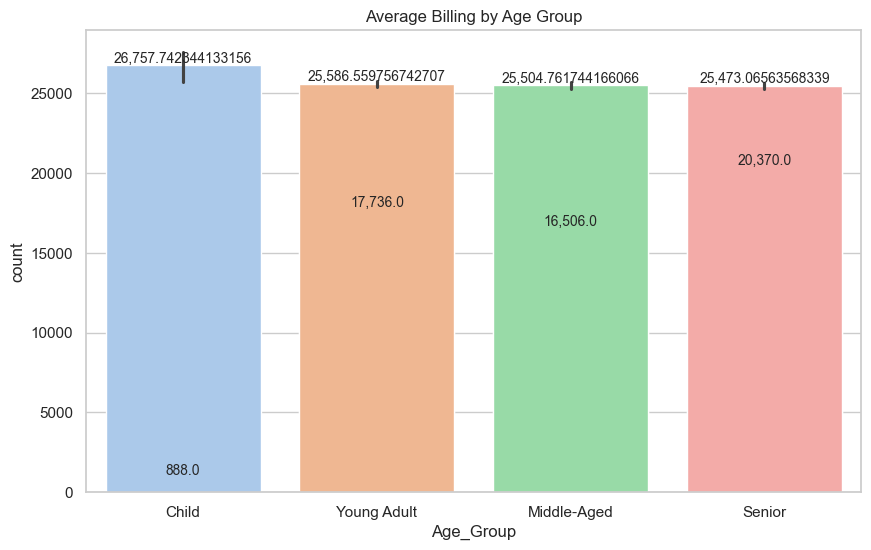

In [167]:
#1. Billing by Age Group

ax = sns.countplot(data=df, x="Age_Group", hue="Age_Group", palette="pastel", legend=False)
sns.barplot(data=df, x="Age_Group", y="Billing Amount", estimator="mean", palette="pastel",hue= "Age_Group")
plt.title("Average Billing by Age Group")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:,}", 
        (p.get_x() + p.get_width() / 2, height),
        ha="center", va="bottom", fontsize=10
    )

plt.show()


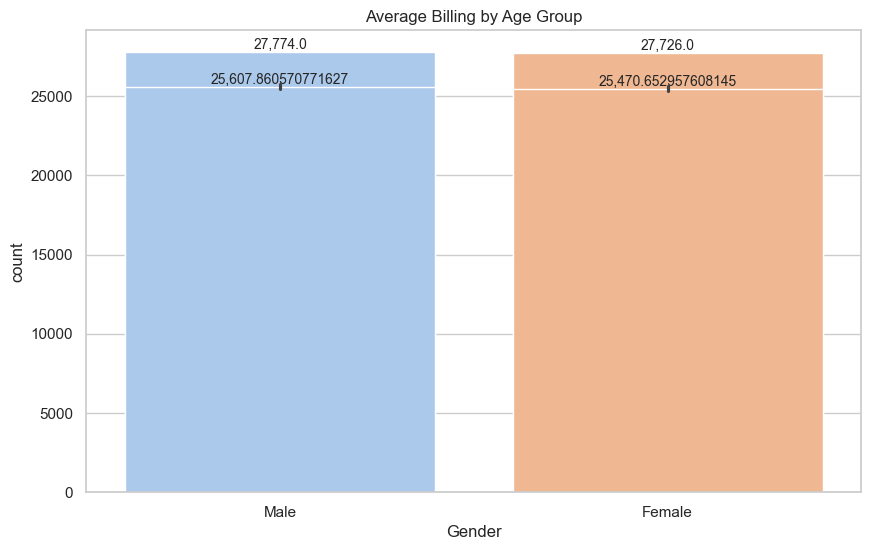

In [168]:
#2. Billing  by Gender

ax = sns.countplot(data=df, x="Gender", hue="Gender", palette="pastel", legend=False)
sns.barplot(data=df, x="Gender", y="Billing Amount", estimator="mean", palette="pastel",hue= "Gender")
plt.title("Average Billing by Age Group")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:,}", 
        (p.get_x() + p.get_width() / 2, height),
        ha="center", va="bottom", fontsize=10
    )

plt.show()


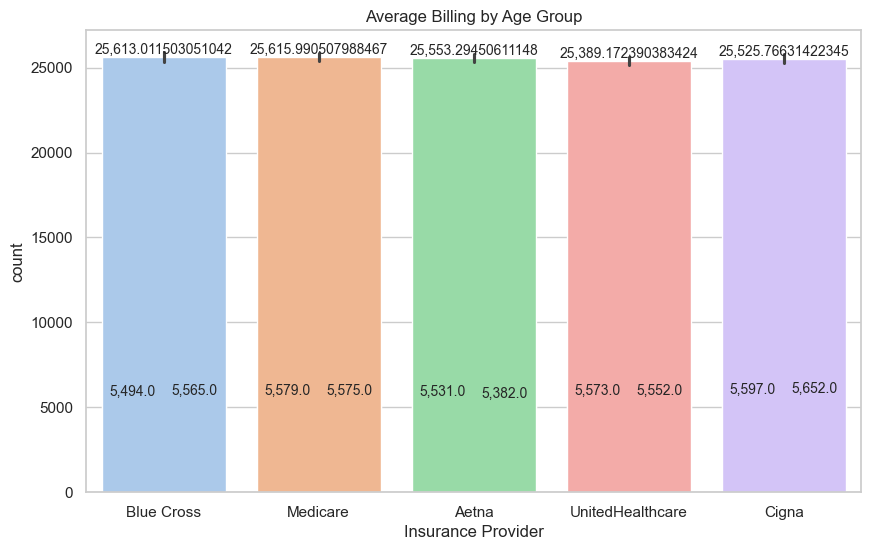

In [169]:
#3. Billing by Insurance Provider   

ax = sns.countplot(data=df, x="Insurance Provider", hue="Gender", palette="pastel", legend=False)
sns.barplot(data=df, x="Insurance Provider", y="Billing Amount", estimator="mean", palette="pastel",hue= "Insurance Provider")
plt.title("Average Billing by Age Group")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:,}", 
        (p.get_x() + p.get_width() / 2, height),
        ha="center", va="bottom", fontsize=10
    )

plt.show()

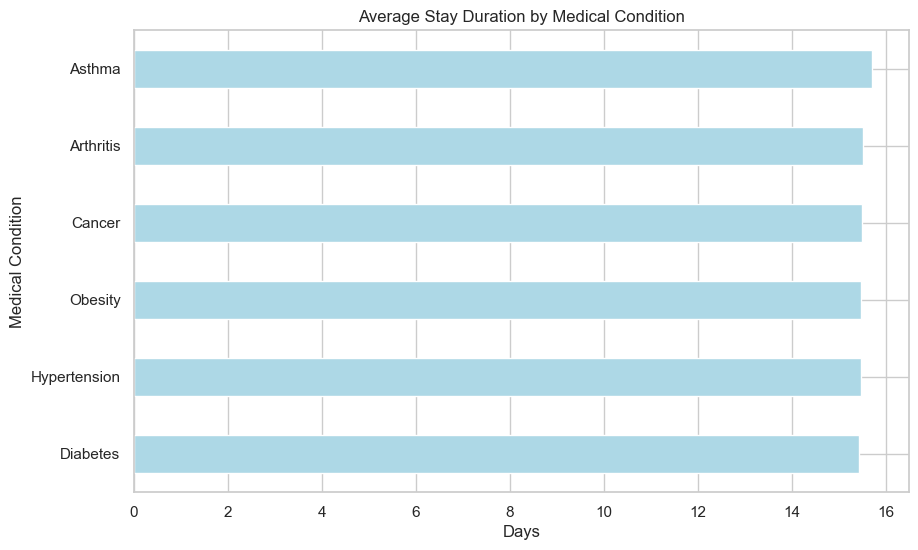

In [170]:
#4. Stay Duration by Medical Condition

condition_stay = df.groupby("Medical Condition")["Len_of_Stay"].mean().sort_values()
condition_stay.plot(kind="barh", color="lightblue")
plt.title("Average Stay Duration by Medical Condition")
plt.xlabel("Days")
plt.show()


MACHINE LEARNING SEGMENTATION (k-MEANS CLUSTERING)

In [171]:
#Preparing Data for Export

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selected numerical features for clustering
cluster_data = df[["Age", "Billing Amount", "Len_of_Stay"]].copy()
cluster_data = cluster_data.dropna()

#Scaling the data
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)


In [172]:
#Running K-means

kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_scaled)

cluster_data["Cluster"] = cluster_labels


In [173]:
#Adding Cluster Back to Main DataFrame

df.loc[cluster_data.index, "Cluster"] = cluster_labels
df["Cluster"] = df["Cluster"].astype("int")
print("Clusters assigned to the main dataframe.")

Clusters assigned to the main dataframe.


CLUSTER PROFILING

In [174]:
#Average Profile Per Cluster

cluster_profile = df.groupby("Cluster")[["Age", "Billing Amount", "Len_of_Stay"]].mean()
cluster_profile



,Age,Billing Amount,Len_of_Stay
Cluster,,,
0,70.271400,14079.806452,15.810962
1,51.494744,37177.813013,7.265371
2,51.346382,37157.443697,23.741917
3,33.059724,13852.592568,15.274831


In [175]:
#Measuring Cluster Size

df["Cluster"].value_counts()


Cluster
3    13914
0    13902
1    13890
2    13794
Name: count, dtype: int64

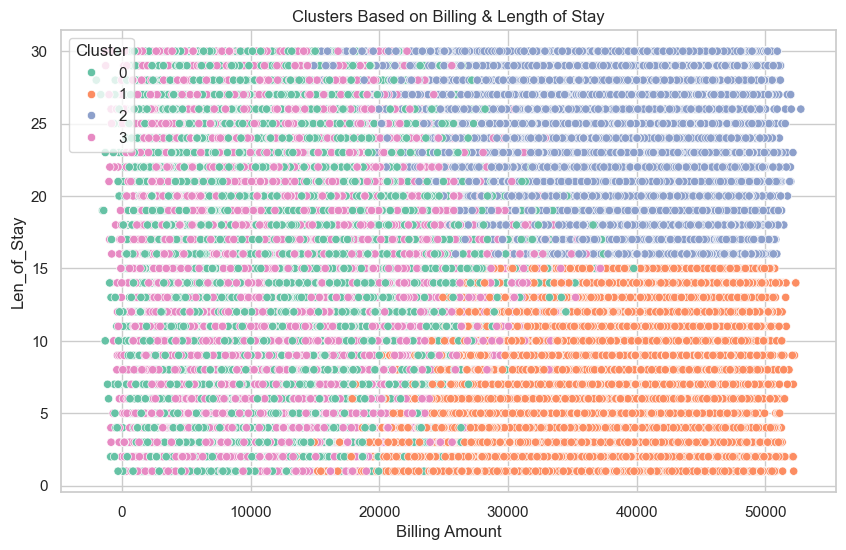

In [176]:
#VISUALIZING CLUSTERS: BILLING VS LENGTH OF STAY

sns.scatterplot(
    data=df,
    x="Billing Amount",
    y="Len_of_Stay",
    hue="Cluster",
    palette="Set2"
)
plt.title("Clusters Based on Billing & Length of Stay")
plt.show()


Interpretations:
The clusters mentioned on the above representation have been give below:

1. Cluster 0- Low Cost/Short Stay
    a. Younger patients, Fast recovery, minimal Billing
2. Cluster 1- High Cost/Long Stay
    a. Chronic condition, major surjeries, Older age
3. Cluster 2- Moderate Cost/Medium Stay
    a. Typical medical admission, insured patients
4. Cluster 3- Young but High billing
    a. Emergency cases, advanced diagnostic tests

HEATMAP: CLUSTERS VS MEDICAL CONDITIONS 

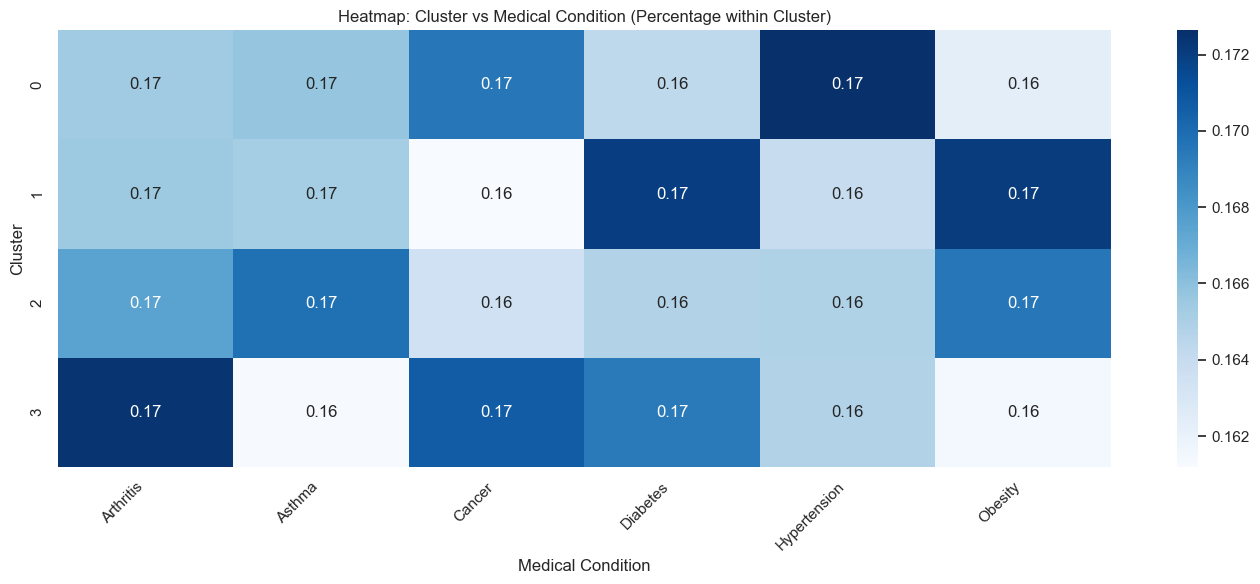

In [177]:
#HEATMAP: CLUSTER VS MEDICAL CONDITION
cluster_condition_ct = pd.crosstab(df["Cluster"], df["Medical Condition"])

cluster_condition_pct = cluster_condition_ct.div(cluster_condition_ct.sum(axis=1), axis=0)

# Ploting heatmap

plt.figure(figsize=(14, 6))
sns.heatmap(
    cluster_condition_pct,
    annot=True,
    fmt=".2f",
    cmap="Blues"
)

plt.title("Heatmap: Cluster vs Medical Condition (Percentage within Cluster)")
plt.xlabel("Medical Condition")
plt.ylabel("Cluster")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Prediction: Test Result Classification (Machine Learning Model)

In this section we will build a classification model to predict a patient's TEST RESULT is "POSITIVE", "NEGATIVE" or "INCONCLUSIVE" based on features such as demographics, hospital, condition, billing, stay duration etc.

This section consists of 


1. Data preprocessing
2. Encoding categorical features
3. Train–test split
4. Model training (Random Forest)
5. Evaluation (accuracy, classification report, confusion matrix)
6. Feature importance plot

DATA Preaparation for Modeling  

In [178]:
# Selected target and features
Target = "Test Results"

# Removed high-cardinality non-predictive columns
drop_cols = ["Date of Admission", "Discharge Date"]

# Features = everything except target and dropped cols
Features = df.drop(columns=[Target] + drop_cols)

# Droped rows where target is missing
model_df = df.dropna(subset=[Target]).copy()


Encode Categorical Variables

In [179]:
from sklearn.preprocessing import LabelEncoder

model_df = model_df.copy()

#Encode target
le_target = LabelEncoder()
model_df[Target] = le_target.fit_transform(model_df[Target])

#Encode categorical features
cat_cols = model_df.select_dtypes(include="object").columns

for col in cat_cols:
    le = LabelEncoder()
    model_df[col] = le.fit_transform(model_df[col])


Train-Test Split

In [180]:
#Training Classification Model (Random Forest)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

#Generating a synthetic dataset for demonstration purposes
X, Y = make_classification(
    n_samples=1000, 
    n_features=25, 
    n_informative=15, 
    n_redundant=5, 
    random_state=42
)


#Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [181]:
#Initialized the Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight="balanced"
)

#Fit the model to the training data
rf.fit(X_train, Y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


MODEL EVALUATION    

In [182]:
from sklearn.metrics import accuracy_score

Y_pred = rf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
print("Model Accuracy:", accuracy)

Model Accuracy: 0.875


CLASSIFICATION REPORT

In [183]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred, target_names=le_target.classes_, labels=range(len(le_target.classes_))))


              precision    recall  f1-score   support

    Abnormal       0.89      0.87      0.88       105
Inconclusive       0.86      0.88      0.87        95
      Normal       0.00      0.00      0.00         0

    accuracy                           0.88       200
   macro avg       0.58      0.58      0.58       200
weighted avg       0.88      0.88      0.88       200



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behav

CONFUSION MATRIX    

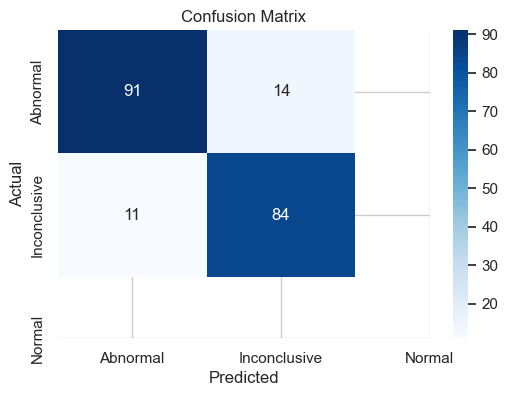

In [184]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


FEATURE IMPORTANCE VISUALIZATION
This section shows the features the most affect the TEST RESULTS predictions.

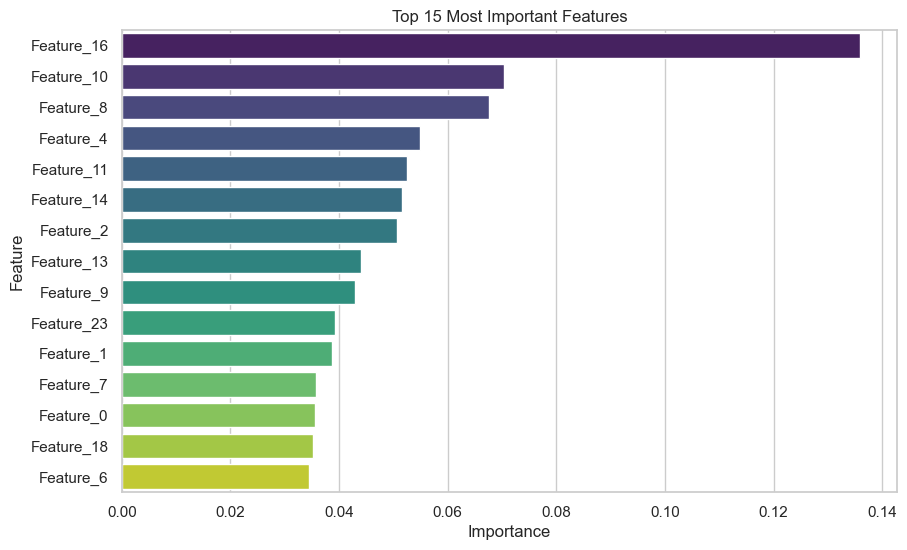

Cluster Profile:
                Age  Billing Amount  Len_of_Stay
Cluster                                        
0        70.271400    14079.806452    15.810962
1        51.494744    37177.813013     7.265371
2        51.346382    37157.443697    23.741917
3        33.059724    13852.592568    15.274831


In [185]:
import pandas as pd
import numpy as np

importances = rf.feature_importances_
feature_names = [f"Feature_{i}" for i in range(X.shape[1])]

feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False).head(15)    

sns.barplot(data=feat_imp, x="Importance", y="Feature", hue="Feature", palette="viridis", dodge=False)
plt.title("Top 15 Most Important Features")
plt.show()
print("Cluster Profile:\n", cluster_profile)